In [26]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
import re

In [7]:
directory = os.getenv('HOME') +'/aiffel/aiffelthon/meta/'

In [4]:
os.listdir(directory)

['reg_1.json',
 'meta_data_included_raw_v2.csv',
 '.ipynb_checkpoints',
 'meta_eng_raw_0306_v1.csv',
 'kor_text.xlsx',
 'reg_3.json',
 'meta_data_included_raw.csv',
 'meta_data_raw_eng_match_6m.csv',
 'kor_text.txt',
 'meta_raw_eng_sts_v1.csv',
 'reg_4.json',
 'kw_t.json',
 'reg_5.json',
 'meta_data_raw_0306.csv',
 'reg_2.json']

In [8]:
df = pd.read_csv(directory + 'meta_raw_eng_sts_v1.csv')

/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949888 entries, 0 to 949887
Data columns (total 20 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   reg          949888 non-null  object 
 1   stdn         949888 non-null  object 
 2   dial         949888 non-null  object 
 3   eng          949888 non-null  object 
 4   eojeol_stdn  949888 non-null  object 
 5   sts          949888 non-null  float64
 6   sts_q        949888 non-null  object 
 7   title        949888 non-null  object 
 8   year         949888 non-null  object 
 9   date         949888 non-null  object 
 10  category     949706 non-null  object 
 11  topic        949888 non-null  object 
 12  age          949888 non-null  object 
 13  sex          949888 non-null  object 
 14  prin_res     949888 non-null  object 
 15  curr_res     949888 non-null  object 
 16  age2         659954 non-null  object 
 17  sex2         659954 non-null  object 
 18  prin_res2    659954 non-

# Data Cleaning

In [27]:
def sen_len(corpus, kor=False) :
    max_len = 0
    min_len = 999
    cum_len = 0
    max_content = ''
    min_content = ''
    for i in corpus :
        if kor : 
            i = i[0]
        length = len(i)
        if length >= max_len : 
            max_len = length
            max_content = i
        if length <= min_len : 
            min_len = length
            min_content = i
        cum_len += length
    
    print(f'max_len : {max_len}')
    print('max_content :', max_content)
    print(f'min_len : {min_len}')
    print('min_content :', min_content)
    print(f'average_len : {round(cum_len/len(corpus),1)}')
    
    return max_len, min_len, cum_len

In [28]:
def plot_seq_dist(corpus,kor=False) :
    max_len, min_len , _ = sen_len(corpus,kor)
    seq_len_matrix = np.zeros((max_len+1), dtype=int)
    for i in corpus :
        if kor :
            i = i[0]
        length = len(i)
        seq_len_matrix[length] += 1
    
    fig,ax = plt.subplots()
    hist = ax.bar(range(len(seq_len_matrix)),seq_len_matrix)
    plt.title('seq_distribution')
    plt.show()

max_len : 2717
max_content : And to be honest, it's a little bit funny, and sometimes when you look at things like D-C-C-I-I-I don't know if they're kind of funny, so I'm not sure if they're doing something like roll or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something or something like that or something like that or something or something like that or something like that or something or something or something like that or something or something or something or something or something or something or something or something or something or something or something or something 

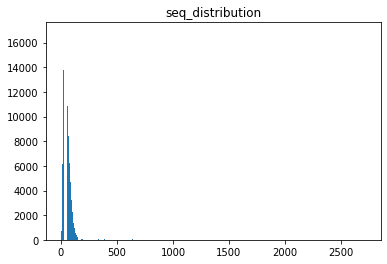

In [29]:
plot_seq_dist(df['eng'])

In [11]:
df = df.loc[:,['reg','topic','stdn','dial','eng','eojeol_stdn','sts']].copy()

In [30]:
# find len of char in eng
df['eng_c_len'] = df['eng'].apply(lambda x : len(x))
df.head()

,reg,topic,stdn,dial,eng,eojeol_stdn,sts,eng_c_len
0,jd,역사,생각이 쪼금씩 바뀌더라고,생각이 쪼금씩 바뀌드라고,I've changed my mind a little bit.,[['(바뀌드라고)/(바뀌더라고)']],0.056177,34
1,jd,가족,어 알겠는가 외국인들이 그래도 잘 적응하고,어 알겄는가 외국인들이 그래도 잘 적응하고,You know what? Foreigners still get used to it.,[['(알겄는가)/(알겠는가)']],-0.006247,47
2,jd,건강,아으 갑자기 예전에 맹장 뜯은 게 생각난다.,아으 갑자기 예전에 맹장 뜯은 게 생각난디야.,"All of a sudden, I think I've ripped off my ap...",[['(생각난디야.)/(생각난다.)']],0.174105,60
3,jd,스타일,보면은 조금 품위 있게 나이 들어가야 되겠단 생각을 참 많이 해요.,보면은 쫌 품위 있게 나이 들어가야 되겠단 생각을 참 많이 해요.,I have a lot of ideas about getting older in a...,[['(쫌)/(조금)']],0.120993,66
4,jd,먹거리,약간 조금 약간 맛이 쪼끔 거시기 하긴 한데 그래도,약간 쫌 약간 맛이 쪼끔 거시기 하긴 한데 그래도,"It's a little bit of a tastey, but still...",[['(쫌)/(조금)']],0.256973,43


In [31]:
long_sen = df.loc[df['eng_c_len'] > 150,'eng'].head()
for i in long_sen :
    print(i, end='\n\n') # 반복되는 문구가 있는 데이터들이 존재하네요 이런 데이터들만 먼저 찾아 보겠습니다.

But then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose, and then you lose,

You're not playing, you're not playing, you're not dreaming, you're not playing, you're not playing, you're not playing, you're not playing, you're not playing.

It's a little bit different from what I

In [32]:
from time import perf_counter

start_time = perf_counter()
df['anom'] = df.eng.str.contains(r'(.+)\1{3,}', regex=True)
print(f'{perf_counter() - start_time:.3f}ms')
df.loc[df['anom'] == True, 'description'] = 'repeated words'

/tmp/ipykernel_397/2038003786.py:4: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df['anom'] = df.eng.str.contains(r'(.+)\1{3,}', regex=True)


55.714ms


max_len : 2717
max_content : And to be honest, it's a little bit funny, and sometimes when you look at things like D-C-C-I-I-I don't know if they're kind of funny, so I'm not sure if they're doing something like roll or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something like that or something or something like that or something like that or something or something like that or something like that or something or something or something like that or something or something or something or something or something or something or something or something or something or something or something or something 

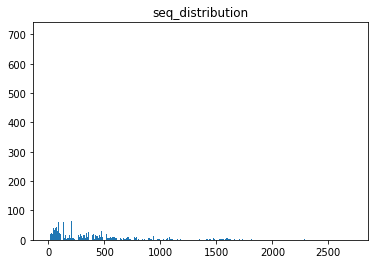

In [33]:
plot_seq_dist(df.loc[df['anom'] == True,'eng'])

In [34]:
df.loc[df['eng_c_len'] ==df['eng_c_len'].max()]

,reg,topic,stdn,dial,eng,eojeol_stdn,sts,eng_c_len,anom,description
77597,jd,게임,조금 솔직히 조금 생긴 게 웃기게 생겨가지고 그거 가끔씩 디씨 같은 데 짤 같은 거...,쫌 솔직히 쫌 생긴 게 웃기게 생겨가지고 그거 가끔씩 디씨 같은 데 짤 같은 거 보...,"And to be honest, it's a little bit funny, and...","[['(쫌)/(조금)', '(쫌)/(조금)', '(쫌)/(조금)']]",0.146649,2717,True,repeated words


In [35]:
# save index with anomalies
anls = df[df['anom'] == True].index.tolist()

In [41]:
#번역이 이상한것들은 재번역 실시
anom_stdn = df.iloc[anls].stdn.values

In [42]:
anom_stdn[:4]

array(['근데 쪘다가 또 빠졌다가 또 쪘다가 이렇게', '놀이 있냐 이게 플레이냐 꿈이냐 틀리잖아 그니까',
       '희한한 맛이었어 뭘 긍까 뭐라할까 김 그 김 김밥나라나 이런 데에서 싸는 그런 맛이랑 조금 다른 맛이었어.',
       '저~ 야 얌전히 누여가지고 좀 누가 이렇게 기름 바른 것 같이'], dtype=object)

In [43]:
from transformers import pipeline

In [44]:
model_ckpt2= 'circulus/kobart-trans-ko-en-v2' #bart`
pipe = pipeline('translation', model = model_ckpt2, device=0,max_length=256)

Downloading:   0%|          | 0.00/1.41k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/473M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/304 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/123 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.00M [00:00<?, ?B/s]

In [52]:
import datasets
dataset = datasets.Dataset.from_dict({'text':anom_stdn})

In [60]:
dataset.map

Dataset({
    features: ['text'],
    num_rows: 13232
})

In [68]:
def test_dat(x):
    return {'translation' : pipe(x['text'])[0]['translation_text']}

In [71]:
corrected_translation = dataset.map(lambda ds : {'eng_trans' : pipe(ds['text'])[0]['translation_text']})

  0%|          | 0/13232 [00:00<?, ?ex/s]

In [72]:
df.iloc[anls][:10].eng

7      But then you lose, and then you lose, and then...
8      You're not playing, you're not playing, you're...
32     It's a little bit different from what I'm abou...
48     Hey, hey, hey, hey, hey, hey, hey, hey, hey, h...
78     It's really, really, really, really, really, r...
154    I always have to make drinks, and then I get d...
185    That's when she's gonna be here, and now she's...
193    It's not like he's such a pussy, and he's like...
199    But I'm telling her to catch it, and I'm not, ...
220    It's-it's-it's-it's-it's-it's-it's-it's-it's-i...
Name: eng, dtype: object

In [98]:
corr_eng = corrected_translation['eng_trans']

In [82]:
len(corr_eng)

13232

In [95]:
df['eng_corr'] = df['eng']

In [97]:
corr_eng

0        But I gained more more more more more more mor...
1              Its different whether its a play or a dream
2        It tasted strange what I said It tasted a litt...
3        Hey hey he is quiet and it looks like someone ...
4        Its really so soft and soft that youre telling...
                               ...                        
13227    Then stay still and just let it be let it be l...
13228    Who shot it I told him to shoot a gun but the ...
13229    Ifs its 30000 won or 1000 won its almost the p...
13230    Because the land is a little over 10000 pyeong...
13231    Only they have bugs that are very very very ve...
Length: 13232, dtype: object

In [102]:
df.loc[anls,['eng_corr']] = corr_eng

In [104]:
df.loc[anls,['stdn','eng','eng_corr']]

,stdn,eng,eng_corr
7,근데 쪘다가 또 빠졌다가 또 쪘다가 이렇게,"But then you lose, and then you lose, and then...",But I gained more more more more more more mor...
8,놀이 있냐 이게 플레이냐 꿈이냐 틀리잖아 그니까,"You're not playing, you're not playing, you're...",Its different whether its a play or a dream
32,희한한 맛이었어 뭘 긍까 뭐라할까 김 그 김 김밥나라나 이런 데에서 싸는 그런 맛이...,It's a little bit different from what I'm abou...,It tasted strange what I said It tasted a litt...
48,저~ 야 얌전히 누여가지고 좀 누가 이렇게 기름 바른 것 같이,"Hey, hey, hey, hey, hey, hey, hey, hey, hey, h...",Hey hey he is quiet and it looks like someone ...
78,진짜 완전 이렇게 완전 허여멀건 해가지고 건더기 동동동 떠다닌 거를 나보고 먹어라는...,"It's really, really, really, really, really, r...",Its really so soft and soft that youre telling...
...,...,...,...
949596,그럼 가만히해서 #이 그냥 #이,Then stay still and just let it be let it be l...,Then stay still and just let it be let it be l...
949655,누가 쏜거야 -초- 총을 쏠라고 했는데 그~ 오 만 불로 산 흑인 남자가 자기가 대...,Who shot it I told him to shoot a gun but the ...,Who shot it I told him to shoot a gun but the ...
949689,삼만 구천 원 이면 거의 뷔페 값이다. #이,Ifs its 30000 won or 1000 won its almost the p...,Ifs its 30000 won or 1000 won its almost the p...
949692,왜냐하면 땅이 한 만평 조금 넘는데 거기에 한 거의 한 칠천평 이상이 짤려서 들어갈...,Because the land is a little over 10000 pyeong...,Because the land is a little over 10000 pyeong...


In [105]:
df.to_csv(directory + 'meta_raw_eng_corrected_sts_v1.csv')

max_len : 755
max_content : Then ..............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
min_len : 2
min_content : He
average_len : 81.3


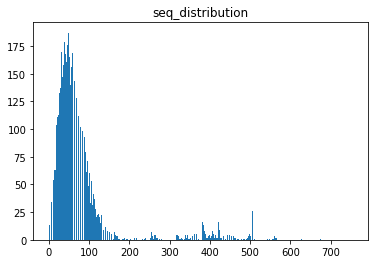

In [109]:
plot_seq_dist(df.loc[df['anom'] == True,'eng_corr'])

In [110]:
start_time = perf_counter()
df['anom_corr'] = df.eng_corr.str.contains(r'(.+)\1{3,}', regex=True)
print(f'{perf_counter() - start_time:.3f}ms')
df.loc[df['anom_corr'] == True, 'description'] = 'repeated words'

/tmp/ipykernel_397/1334004069.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df['anom_corr'] = df.eng_corr.str.contains(r'(.+)\1{3,}', regex=True)


51.332ms


In [112]:
df.loc[df['anom_corr']==True]['eng_corr'].values

array(['But I gained more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more more mor',
       'Is it so expensive that the toy is 200000 won',
       'Itno why is it 100000 peaks of Kalbawi Rock in Geumgangsan Mountain',
       ...,
       'Ifs its 30000 won or 1000 won its almost the price of a buffet',
       'Because the land is a little over 10000 pyeong and almost about 7000 pyeong or more will be put in',
       'Only they have bugs that are very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very very ver

In [118]:
!pip install openpyxl

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
     |████████████████████████████████| 249 kB 5.9 MB/s            


In [119]:
df.loc[df['anom_corr']==True]['stdn'].to_frame().to_excel(directory + 'meta_raw_eng_corrected_sts_v1_needs_correction.xlsx')

In [123]:
corr_trans_2 = pd.read_excel(directory + 'meta_raw_eng_corrected_sts_v1_needs_correction_translated.xlsx')

In [130]:
corr_trans_2.stdn.values

array([' But I gained weight, then lost weight, gained weight again, then like this',
       ' Why is it so expensive? A toy costs 220,000 won.',
       ' The real Geumgangsan Mountain is said to be 11,000 sword rocks, but it is only 12,000 peaks.',
       ...,
       ' Thirty-nineteen thousand won is almost the price of a buffet. #this',
       ' Because the land is a little over 10,000 pyeong, and more than 7,000 pyeong will be cut off there.',
       ' Bugs are just bubbling with them.'], dtype=object)

In [131]:
df['eng_corr2'] = df['eng_corr']
df.loc[df['anom_corr']==True, 'eng_corr2'] = corr_trans_2.stdn.values

In [132]:
df.loc[df['anom_corr']==True, 'eng_corr2']

7          But I gained weight, then lost weight, gained...
2074       Why is it so expensive? A toy costs 220,000 won.
3468       The real Geumgangsan Mountain is said to be 1...
7090       It's all about memorization -ha- -ha- I can't...
7746       This, this, this, this, this, this, this, thi...
                                ...                        
949596                     Then stay still #this just #this
949655                                         Who shot it?
949689     Thirty-nineteen thousand won is almost the pr...
949692     Because the land is a little over 10,000 pyeo...
949711                    Bugs are just bubbling with them.
Name: eng_corr2, Length: 2781, dtype: object

max_len : 334
max_content :  In the field to add that there are things that do not exist, in the field to add that there are things that do not have to be beaten, in the field to add that there are things that do not exist, there are people who attack to slap People in the field to add that there are things that do not exist, and people who attack to slap them
min_len : 4
min_content :  yes
average_len : 68.3


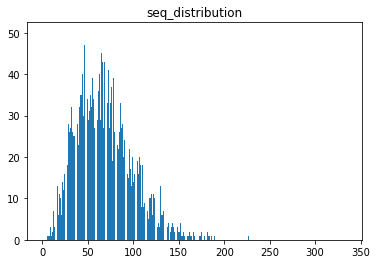

In [133]:
plot_seq_dist(df.loc[df['anom_corr'] == True,'eng_corr2'])

In [134]:
start_time = perf_counter()
df['anom_corr2'] = df.eng_corr2.str.contains(r'(.+)\1{3,}', regex=True)
print(f'{perf_counter() - start_time:.3f}ms')
df.loc[df['anom_corr2'] == True, 'description'] = 'repeated words'

/tmp/ipykernel_397/2727745418.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df['anom_corr2'] = df.eng_corr2.str.contains(r'(.+)\1{3,}', regex=True)


51.706ms


In [135]:
df.loc[df['anom_corr2'] == True]

,reg,topic,stdn,dial,eng,eojeol_stdn,sts,eng_c_len,anom,description,eng_corr,anom_corr,eng_corr2,anom_corr2
7746,jd,스타일,이거 이거 이거 이거 이거 이거 이거 이거 이거 뭐~ 턱도 깎고 막 그러는데,이거 이거 이거 이거 이거 이거 이거 이거 이거 뭐~ 턱도 깎고 막 그러는디,"Hey, hey, hey, hey, hey, hey, hey, hey, hey, h...",[['(그러는디)/(그러는데)']],0.182807,829,True,repeated words,This this this this this this this this this t...,True,"This, this, this, this, this, this, this, thi...",True
9703,jd,아르바이트,아니야 아니야 아니야 아니야,아녀 아니여 아녀 아녀,"No, no, no, no, no.","[['(아녀)/(아니야)', '(아니여)/(아니야)', '(아녀)/(아니야)', '...",0.009290,19,True,repeated words,No no no no no,True,no no no no,True
33508,jd,꿈(목표),동생한테 야 야 야 저기 뭐야 거시기 거시기 아~ 야 야 야 저기 우리는 이제 마당...,동생한테 야 야 야 저기 뭐여 거시기 거시기 아~ 야 야 야 저기 우리는 이제 마당...,"Hey, hey, hey, hey, hey, hey, hey, hey, there'...","[['(뭐여)/(뭐야)', '(쩌쪽)/(저쪽)', '(쩌쪽)/(저쪽)', '(있었응...",-0.049492,119,True,repeated words,Hey hey hey hey hey hey hey hey hey hey hey he...,True,To my younger brother Hey hey hey hey hey hey...,True
145828,jj,취미,아주 아주 아주 아주 많이 엄청 엄청.,아주 아주 아주 아주 많이 하영 하영.,"Very, very, very, very, very, very, very large.","[['(하영)/(엄청)', '(하영.)/(엄청.)']]",0.048581,47,True,repeated words,Very very very very very very very very,True,very very very very very very very very much.,True
148343,jj,드라마,피도 나왔다가 계속 막 바뀌어서 뭐 뭐가 뭔지 뭐가 하나 뭐가 맞는건지,피도 나왔다가 계속 막 바껴가지고 뭐 뭐가 뭔지 뭐가 하나 뭐가 맞는건지,"He's got blood, and it's been changed all the ...",[['(바껴가지고)/(바뀌어서)']],0.055134,547,True,repeated words,The blood came out and changed so what what wh...,True,"Blood came out, but it kept changing so what ...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926291,jj,먹거리,저 겨울 없으면 그 이거 이거 이거 뭐라 이거 손 손전화기,저 겨울 어시면 그 이거 이거 이거 뭐라 이거 손 손전화기,If there is no winter this this this this this...,[['(어시면)/(없으면)']],0.012777,626,True,repeated words,If there is no winter this this this this this...,True,"If there is no winter, that this this this th...",True
940191,jj,가족,아 그래도 이거 이거 이거 이거 임플란트,아 경해도 이거 이거 이거 이거 임플란트,Oh but this this this this implant,[['(경해도)/(그래도)']],-0.082162,34,True,repeated words,Oh but this this this this implant,True,"Oh, but this this this this this this implant",True
942487,gs,먹거리,그~ 먹으라고 소고기도 이렇게 막 세 개씩 꽂은 거 세 개씩 이렇게 세 개 세 개 ...,그~ 먹으라고 소고기도 이렇게 막 세 개씩 꽂은 거 세 개씩 이케 세 개 세 개 이...,To eat these days three beef three beef three ...,[['(이케)/(이렇게)']],0.234536,72,True,repeated words,To eat these days three beef three beef three ...,True,"To eat it, the beef is like this, three piece...",True
944585,jd,방송/연예,정부 수매 나가면 일등 받으려고 건조를 잘 시켰어요 그랬더니 허허허허허,정부 수매 나가면 일등 맞을라고 건조를 잘 시켰어요 그랬더니 허허허허허,I sold it well to get the first place when the...,[['(맞을라고)/(받으려고)']],0.107805,99,True,repeated words,I sold it well to get the first place when the...,True,"When the government goes out to buy it, I dri...",True


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949888 entries, 0 to 949887
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   reg          949888 non-null  object 
 1   topic        949888 non-null  object 
 2   stdn         949888 non-null  object 
 3   dial         949888 non-null  object 
 4   eng          949888 non-null  object 
 5   eojeol_stdn  949888 non-null  object 
 6   sts          949888 non-null  float64
 7   eng_c_len    949888 non-null  int64  
 8   anom         949888 non-null  bool   
 9   description  13232 non-null   object 
 10  eng_corr     949888 non-null  object 
 11  anom_corr    949888 non-null  bool   
 12  eng_corr2    949888 non-null  object 
 13  anom_corr2   949888 non-null  bool   
dtypes: bool(3), float64(1), int64(1), object(9)
memory usage: 82.4+ MB


In [137]:
df2 = df.copy()

In [151]:
df_final = df2[['reg','topic','stdn','dial','eng','eojeol_stdn','sts']]

In [152]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 949888 entries, 0 to 949887
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   reg          949888 non-null  object 
 1   topic        949888 non-null  object 
 2   stdn         949888 non-null  object 
 3   dial         949888 non-null  object 
 4   eng          949888 non-null  object 
 5   eojeol_stdn  949888 non-null  object 
 6   sts          949888 non-null  float64
dtypes: float64(1), object(6)
memory usage: 50.7+ MB


In [141]:
df2.loc[df2['anom_corr2'] == True]

,reg,topic,stdn,dial,eng,eojeol_stdn,sts,eng_c_len,anom,description,eng_corr,anom_corr,eng_corr2,anom_corr2
7746,jd,스타일,이거 이거 이거 이거 이거 이거 이거 이거 이거 뭐~ 턱도 깎고 막 그러는데,이거 이거 이거 이거 이거 이거 이거 이거 이거 뭐~ 턱도 깎고 막 그러는디,"This, this, this, this, this, this, this, thi...",[['(그러는디)/(그러는데)']],0.182807,829,True,repeated words,This this this this this this this this this t...,True,"This, this, this, this, this, this, this, thi...",True
9703,jd,아르바이트,아니야 아니야 아니야 아니야,아녀 아니여 아녀 아녀,no no no no,"[['(아녀)/(아니야)', '(아니여)/(아니야)', '(아녀)/(아니야)', '...",0.009290,19,True,repeated words,No no no no no,True,no no no no,True
33508,jd,꿈(목표),동생한테 야 야 야 저기 뭐야 거시기 거시기 아~ 야 야 야 저기 우리는 이제 마당...,동생한테 야 야 야 저기 뭐여 거시기 거시기 아~ 야 야 야 저기 우리는 이제 마당...,To my younger brother Hey hey hey hey hey hey...,"[['(뭐여)/(뭐야)', '(쩌쪽)/(저쪽)', '(쩌쪽)/(저쪽)', '(있었응...",-0.049492,119,True,repeated words,Hey hey hey hey hey hey hey hey hey hey hey he...,True,To my younger brother Hey hey hey hey hey hey...,True
145828,jj,취미,아주 아주 아주 아주 많이 엄청 엄청.,아주 아주 아주 아주 많이 하영 하영.,very very very very very very very very much.,"[['(하영)/(엄청)', '(하영.)/(엄청.)']]",0.048581,47,True,repeated words,Very very very very very very very very,True,very very very very very very very very much.,True
148343,jj,드라마,피도 나왔다가 계속 막 바뀌어서 뭐 뭐가 뭔지 뭐가 하나 뭐가 맞는건지,피도 나왔다가 계속 막 바껴가지고 뭐 뭐가 뭔지 뭐가 하나 뭐가 맞는건지,"Blood came out, but it kept changing so what ...",[['(바껴가지고)/(바뀌어서)']],0.055134,547,True,repeated words,The blood came out and changed so what what wh...,True,"Blood came out, but it kept changing so what ...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926291,jj,먹거리,저 겨울 없으면 그 이거 이거 이거 뭐라 이거 손 손전화기,저 겨울 어시면 그 이거 이거 이거 뭐라 이거 손 손전화기,"If there is no winter, that this this this th...",[['(어시면)/(없으면)']],0.012777,626,True,repeated words,If there is no winter this this this this this...,True,"If there is no winter, that this this this th...",True
940191,jj,가족,아 그래도 이거 이거 이거 이거 임플란트,아 경해도 이거 이거 이거 이거 임플란트,"Oh, but this this this this this this implant",[['(경해도)/(그래도)']],-0.082162,34,True,repeated words,Oh but this this this this implant,True,"Oh, but this this this this this this implant",True
942487,gs,먹거리,그~ 먹으라고 소고기도 이렇게 막 세 개씩 꽂은 거 세 개씩 이렇게 세 개 세 개 ...,그~ 먹으라고 소고기도 이렇게 막 세 개씩 꽂은 거 세 개씩 이케 세 개 세 개 이...,"To eat it, the beef is like this, three piece...",[['(이케)/(이렇게)']],0.234536,72,True,repeated words,To eat these days three beef three beef three ...,True,"To eat it, the beef is like this, three piece...",True
944585,jd,방송/연예,정부 수매 나가면 일등 받으려고 건조를 잘 시켰어요 그랬더니 허허허허허,정부 수매 나가면 일등 맞을라고 건조를 잘 시켰어요 그랬더니 허허허허허,"When the government goes out to buy it, I dri...",[['(맞을라고)/(받으려고)']],0.107805,99,True,repeated words,I sold it well to get the first place when the...,True,"When the government goes out to buy it, I dri...",True


In [153]:
df_final.iloc[944585]

reg                                                           jd
topic                                                      방송/연예
stdn                     정부 수매 나가면 일등 받으려고 건조를 잘 시켰어요 그랬더니 허허허허허
dial                     정부 수매 나가면 일등 맞을라고 건조를 잘 시켰어요 그랬더니 허허허허허
eng             When the government goes out to buy it, I dri...
eojeol_stdn                                  [['(맞을라고)/(받으려고)']]
sts                                                     0.107805
Name: 944585, dtype: object

In [154]:
df_final.to_csv(directory + 'meta_raw_eng_corrected_sts_v_final.csv')